In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [32]:
rlc_buffer = np.load('rlc_buffer.npy')
all_grant = np.load('all_grant.npy')

In [9]:
rlc_buffer[0:10]

array([12420., 11908., 11444., 10930., 10512., 10512., 10082.,  9648.,
        9302.,  8972.])

In [13]:
np.arange(10) +3 

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

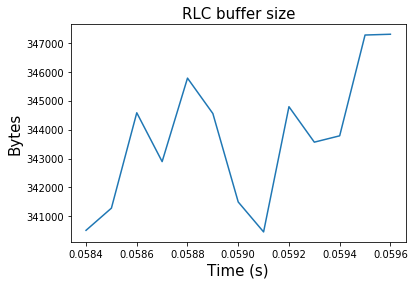

In [31]:
start_point = 422
end_point = 435

plot_y = rlc_buffer[start_point:end_point]
plot_x = (np.arange(len(plot_y)) + 162 + start_point)/10000

plt.title('RLC buffer size', size = 15)
plt.ylabel ('Bytes', size =15)
plt.xlabel('Time (s)', size =15)
plt.plot(plot_x, plot_y)

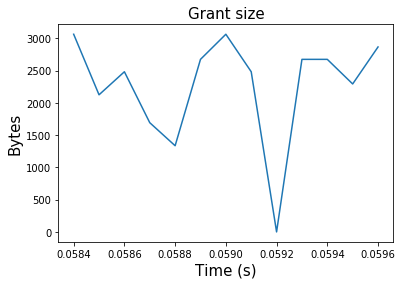

In [38]:
start_point = 422
end_point = 435

plot_y = all_grant[start_point:end_point]
plot_x = (np.arange(len(plot_y)) + 162 + start_point)/10000

plt.title('Grant size', size = 15)
plt.ylabel ('Bytes', size =15)
plt.xlabel('Time (s)', size =15)
plt.plot(plot_x, plot_y)

In [35]:
plot_y

array([3062., 2124., 2481., 1692., 1335., 2673., 3062., 2481.,    0.,
       2673., 2673., 2292., 2865.])

In [114]:
grant_list = np.load('grant.npy')
sent_list = np.load('sent.npy')

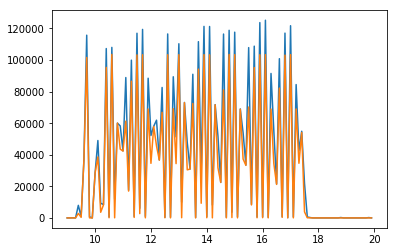

In [122]:
x_ax = np.arange(0, len(grant_list))*0.1

range_start = 90
range_end = 200

plt.plot(x_ax[range_start:range_end], grant_list[range_start:range_end])
plt.plot(x_ax[range_start:range_end], sent_list[range_start:range_end])

162001 9
4339338 88
4 86


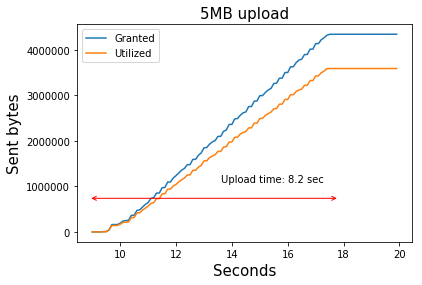

In [129]:
new_ax = x_ax[range_start:range_end]

new_grant = grant_list[range_start:range_end]
new_sent = sent_list[range_start:range_end]

grant_cum = np.cumsum(new_grant)
sent_cum = np.cumsum(new_sent)


find_first = False
find_last = 0
first = 0
last = 0
for i,grant in enumerate(grant_cum):
    if grant > 1000 and not find_first:
        find_first = True
        first = i
    if grant > 1000 and grant_cum[i-1] == grant_cum[i]:
        find_last += 1
        print(grant, i)
    if find_last == 2:
        last = i-2
        break
        
print(first, last)
        
plt.plot(new_ax, grant_cum)
plt.plot(new_ax, sent_cum)
#plt.axhline(y = 0, xmin = first/len(new_ax), xmax = last/len(new_ax), color = 'r')
plt.annotate('', xy = (first/len(new_ax), 0.2),  xycoords = 'axes fraction', \
    xytext = (last/len(new_ax), 0.2), textcoords = 'axes fraction', fontsize = 10, \
    color = '#303030', arrowprops=dict(edgecolor='red', arrowstyle = '<->'))
plt.text(new_ax[last-40], np.int(np.max(grant_cum)*0.25), "Upload time: {} sec".format(np.round((last-first)*0.1,1)), fontsize=10)
plt.title('5MB upload', size =15)
plt.ylabel('Sent bytes', size = 15)
plt.xlabel('Seconds',size = 15)
plt.legend(['Granted', 'Utilized'])

In [70]:
np.int(np.max(grant_cum)*0.25)

79920

In [91]:
np.round((last-first)*0.1,1)

0.7